In [106]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [107]:
xaim = 2000

rflare = 16000

hcloop = 1700

hdecay = 29

sigma_exp = 500

gsstp = np.deg2rad(24)
gssh = np.deg2rad(4)

tgstp = np.tan(gsstp)
tgsh = np.tan(gssh)


def ogs(x):
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xa = xk - rflare*np.sin(gsstp) + hcloop/tgstp

    return max(0.0, (xa - x) * tgstp)

def flare(x):
    
    
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xa = xk - rflare*np.sin(gsstp) + hcloop/tgstp
    
    xflarecir = xk - x
    yflarecir = np.sqrt(rflare**2 - xflarecir**2)

    return hk - yflarecir

def flareexp(x):
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)

    herrexp = hdecay * math.exp((xexp - x)/sigma_exp)
    
    href = igs(x)
    href += min(href, herrexp)
    return max(0.0, href)

def igs(x):

    return max(0.0, (xaim - x) * tgsh)

def igs2(x):
    

    return max(0.0, (xaim - x) * tgsh + hdecay)
    
def flarehdot(x):
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xflarecir = xk - x
    yflarecir = np.sqrt(rflare**2 - xflarecir**2)
    
    return -np.rad2deg(np.arctan(xflarecir/yflarecir))

def exphdot(x):
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    herrexp = hdecay * math.exp((xexp - x)/sigma_exp)
    
    return -np.rad2deg(np.arctan( tgsh + herrexp/sigma_exp ))
    

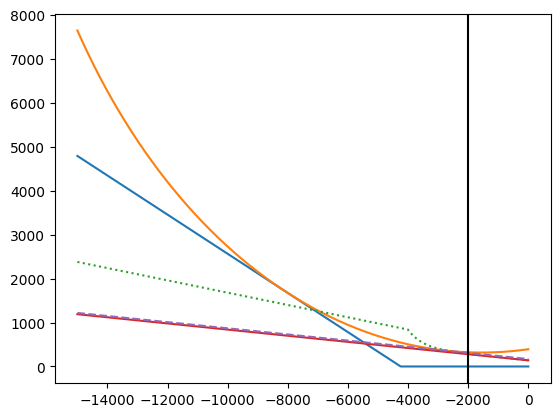

In [108]:
x = np.linspace(-15000, 0, 1000)

plt.figure()

plt.plot(x, [ogs(x_) for x_ in x])
plt.plot(x, [flare(x_) for x_ in x])
plt.plot(x, [flareexp(x_) for x_ in x], ':')
plt.plot(x, [igs(x_) for x_ in x])
plt.plot(x, [igs2(x_) for x_ in x], '--')
plt.axvline(x = -xaim, color = 'k')



(0.0, 1000.0)

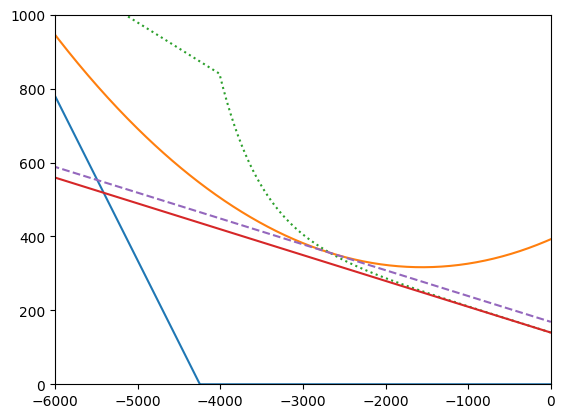

In [109]:
plt.figure()

plt.plot(x, [ogs(x_) for x_ in x])
plt.plot(x, [flare(x_) for x_ in x])
plt.plot(x, [flareexp(x_) for x_ in x], ':')
plt.plot(x, [igs(x_) for x_ in x])
plt.plot(x, [igs2(x_) for x_ in x], '--')

plt.xlim([-6000, 0])
plt.ylim([0, 1000])

-10951.095177025803 -4959.660457803143
-12.282459996881688 -80.0470502869433


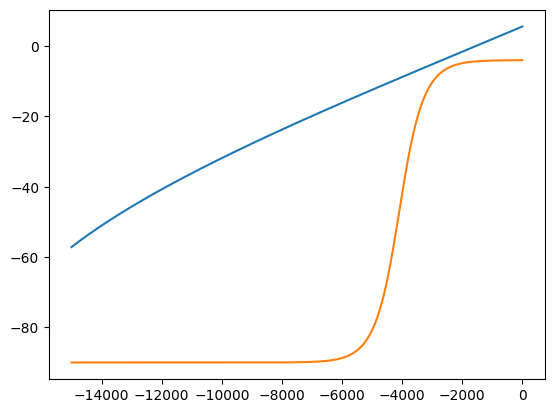

In [110]:
print(-10951.095177025803, -4959.660457803143)

print(flarehdot(-4959.660457803143), exphdot(-4959.660457803143))


plt.figure()

plt.plot(x, [flarehdot(x_) for x_ in x])
plt.plot(x, [exphdot(x_) for x_ in x])

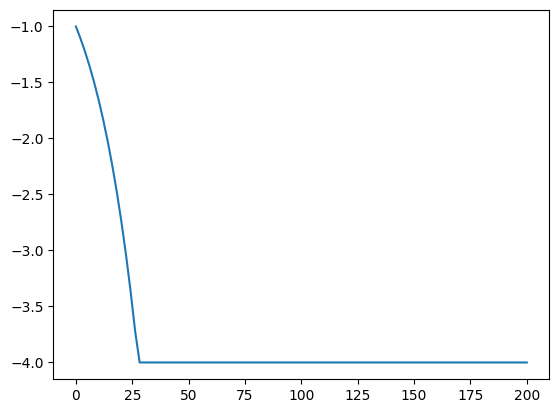

In [126]:
def fnlflhdot(h):
    
    base_hdot = -np.rad2deg(np.arctan(tgsh))
    
    sigma_h_exp = 20
    
    exp_hdot = - math.exp((h)/sigma_h_exp)
    
    return max(base_hdot,  exp_hdot)
    

h = np.linspace(0, 200, 100)
plt.plot(h, [fnlflhdot(h_) for h_ in h])

